In [2]:
# 元ファイルは、nakamura_20250222_help_r2.ipynb

In [3]:
import pickle

def save_pickle(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj, f)


def load_pickle(path):
    with open(path, mode='rb') as f:
        obj = pickle.load(f)
    return obj

In [4]:
import pandas as pd

path = "/disks/qnap2/notebook/t-nakamura/research_lastfm/data/listening_events_20050214_20200320_fin.pkl"
df = pd.read_pickle(path)
print(df.shape)

(1031727229, 13)


In [5]:
df_jpop = df[df["top_tag"] == "j-pop"]
df_rock = df[df["top_tag"] == "rock"]
df_pop = df[df["top_tag"] == "pop"]
df_metal = df[df["top_tag"] == "metal"]
df_kpop = df[df["top_tag"] == "k-pop"]
df_djent = df[df["top_tag"] == "djent"]

df_jpop_2019 = df_jpop[df_jpop["year"] == 2019]
df_rock_2019 = df_rock[df_rock["year"] == 2019]
df_pop_2019 = df_pop[df_pop["year"] == 2019]
df_metal_2019 = df_metal[df_metal["year"] == 2019]
df_kpop_2019 = df_kpop[df_kpop["year"] == 2019]
df_djent_2019 = df_djent[df_djent["year"] == 2019]

In [6]:
countries = ["Indonesia", "Brazil", "Finland", "United States"]

In [7]:
def track_count (df_filtered):
    df_count = (
        df_filtered[["year", "user_id", "track_id"]]
        .groupby("user_id")
        .count()
        .sort_values("track_id", ascending=False)
    )
    data_ = df_count["track_id"].tolist()
    return data_

data_jpop_2019 = track_count(df_jpop_2019)
data_rock_2019 = track_count(df_rock_2019)
data_pop_2019 = track_count(df_pop_2019)
data_metal_2019 = track_count(df_metal_2019)
data_djent_2019 = track_count(df_djent_2019)
data_kpop_2019 = track_count(df_kpop_2019)

## 読み込む時はここから

In [18]:
"""
save_pickle(data_jpop_2019, "./pickle_data/data_jpop_2019.pkl")
save_pickle(data_rock_2019, "./pickle_data/data_rock_2019.pkl")
save_pickle(data_pop_2019, "./pickle_data/data_pop_2019.pkl")
save_pickle(data_metal_2019, "./pickle_data/data_metal_2019.pkl")
save_pickle(data_djent_2019, "./pickle_data/data_djent_2019.pkl")
save_pickle(data_kpop_2019, "./pickle_data/data_kpop_2019.pkl")
"""
data_jpop_2019 = load_pickle("./pickle_data/data_jpop_2019.pkl")
data_rock_2019 = load_pickle("./pickle_data/data_rock_2019.pkl")
data_pop_2019  = load_pickle("./pickle_data/data_pop_2019.pkl")
data_metal_2019 = load_pickle("./pickle_data/data_metal_2019.pkl")
data_djent_2019 = load_pickle("./pickle_data/data_djent_2019.pkl")
data_kpop_2019 = load_pickle("./pickle_data/data_kpop_2019.pkl")

In [17]:
data_dict = load_pickle("./pickle_data/data_dict.pkl")

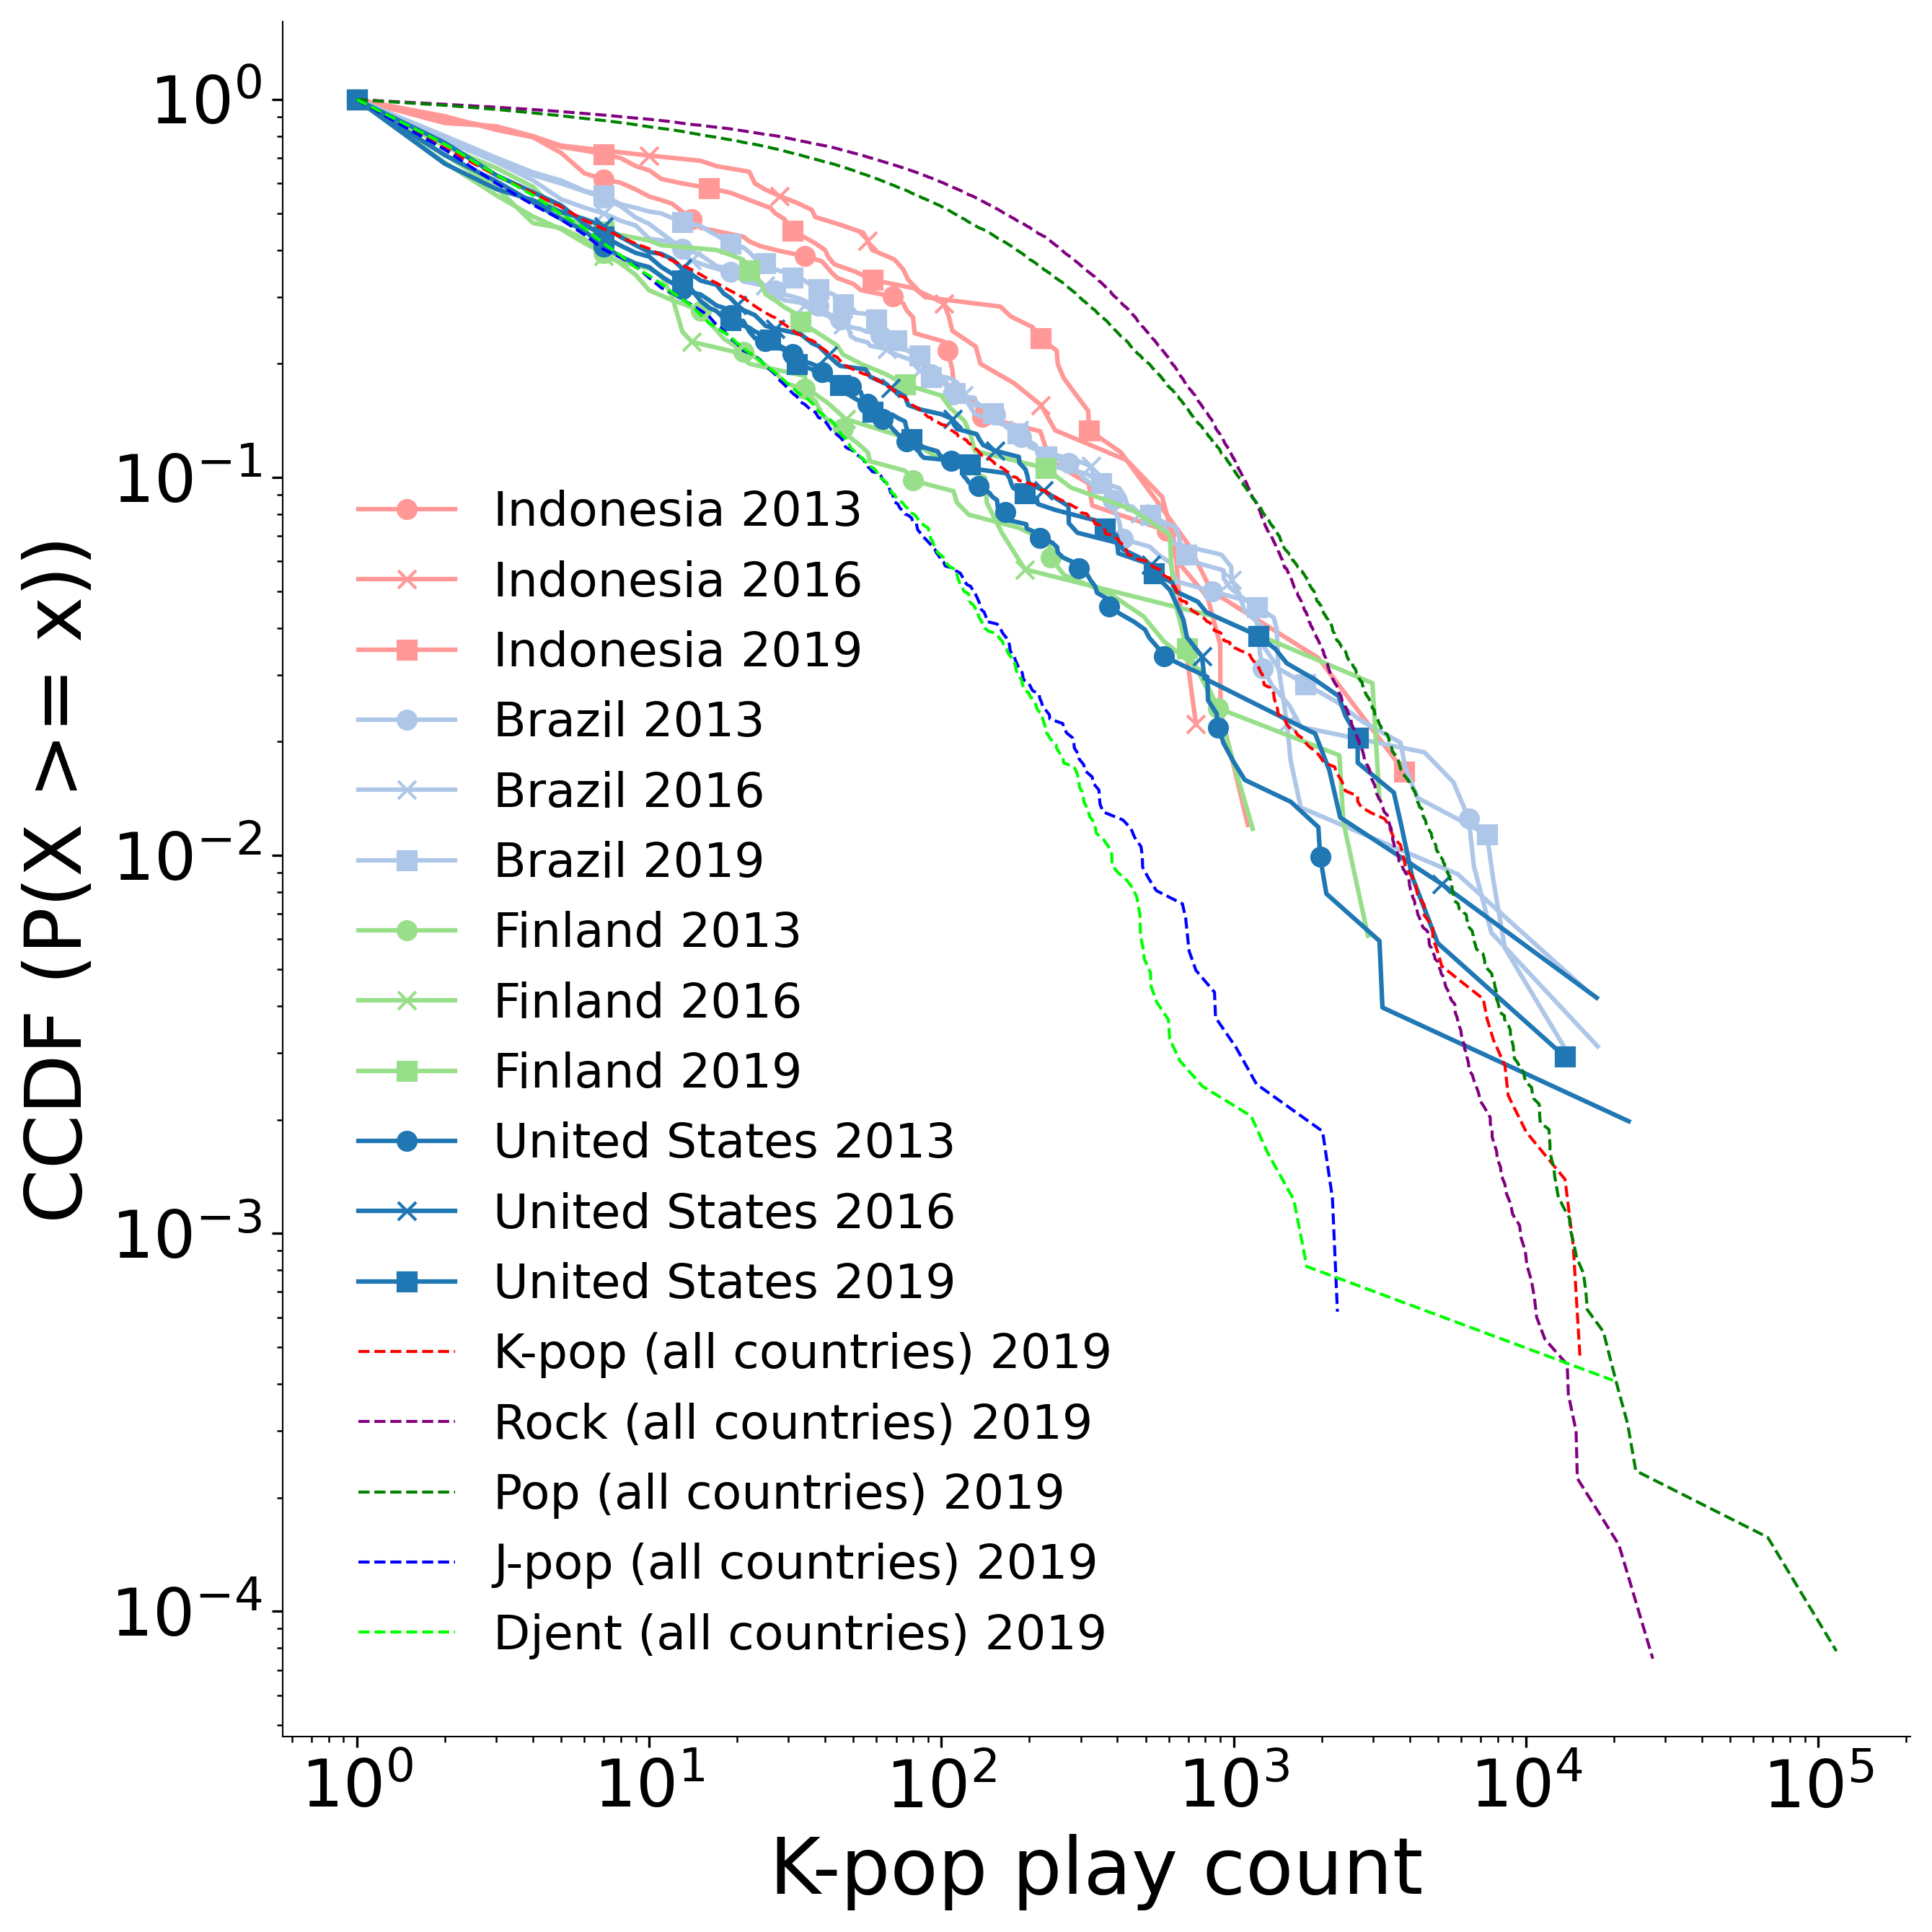

In [27]:
# セル 2: プロット作成
# 西本改修
import matplotlib.pyplot as plt
import powerlaw
import scienceplots

# --- カラーマップ（tab20を使って国に色を割り当て） ---
cmap = plt.get_cmap("tab20")
"""
country_color_map = {
    "United States": cmap(0),   # tab20 の1色目
    "United Kingdom": cmap(4),  # tab20 の5色目
    "Brazil": cmap(1),          # tab20 の2色目
    "Russia": cmap(3),          # tab20 の3色目
}
"""
country_color_map = {
    "Indonesia" : cmap(7),
    "Brazil": cmap(1),          # tab20 の2色目
    "Finland" : cmap(5),
    "United States": cmap(0),   # tab20 の1色目
}

# --- スタイル設定 ---
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])
plt.rc('font', size=9)
plt.rc('axes', titlesize=26, labelsize=26)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.rc('legend', fontsize=26)
plt.rc('lines', linewidth=2.5)

# --- マーカー定義（年ごと）---
markers = ["o", "x", "s", "D"]

# --- 描画 ---
fig, ax = plt.subplots(figsize=(9, 9))
years = list(range(2013, 2020, 3))

for country in countries:
    for j, year in enumerate(years):
        data = data_dict[country][year]
        powerlaw.plot_ccdf(
            data,
            ax=ax,
            color=country_color_map[country],
            marker=markers[j],
            markersize=6,
            markevery=6,
            linewidth=1.5, 
            label=f"{country} {year}"
        )

powerlaw.plot_ccdf(
    data_kpop_2019,
    ax=ax,
    color="r",
    linestyle = "--",
    linewidth=1, 
    label=f"K-pop (all countries) 2019"
)

powerlaw.plot_ccdf(
    data_rock_2019,
    ax=ax,
    color="purple",
    linestyle = "--",
    linewidth=1, 
    label=f"Rock (all countries) 2019"
)

powerlaw.plot_ccdf(
    data_pop_2019,
    ax=ax,
    color="green",
    linestyle = "--",
    linewidth=1, 
    label=f"Pop (all countries) 2019"
)

powerlaw.plot_ccdf(
    data_jpop_2019,
    ax=ax,
    color="blue",
    linestyle = "--",
    linewidth=1, 
    label=f"J-pop (all countries) 2019"
)

powerlaw.plot_ccdf(
    data_djent_2019,
    ax=ax,
    color="lime",
    linestyle = "--",
    linewidth=1, 
    label=f"Djent (all countries) 2019"
)

# --- 軸・ラベル設定 ---
ax.set_xlabel('K-pop play count')
ax.set_ylabel('CCDF (P(X >= x))')
ax.set_xscale('log')
ax.set_yscale('log')

# 不要な枠線の非表示
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(which='both', top=False, right=False)

# 凡例設定（左下に配置）
ax.legend(
    loc='lower left',
    bbox_to_anchor=(0.02, 0.02),
    fontsize=16,
    frameon=False
)

plt.tight_layout()
plt.savefig("ccdf_r2.pdf", dpi=300, bbox_inches='tight')
plt.savefig("ccdf_r2.eps", dpi=300, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


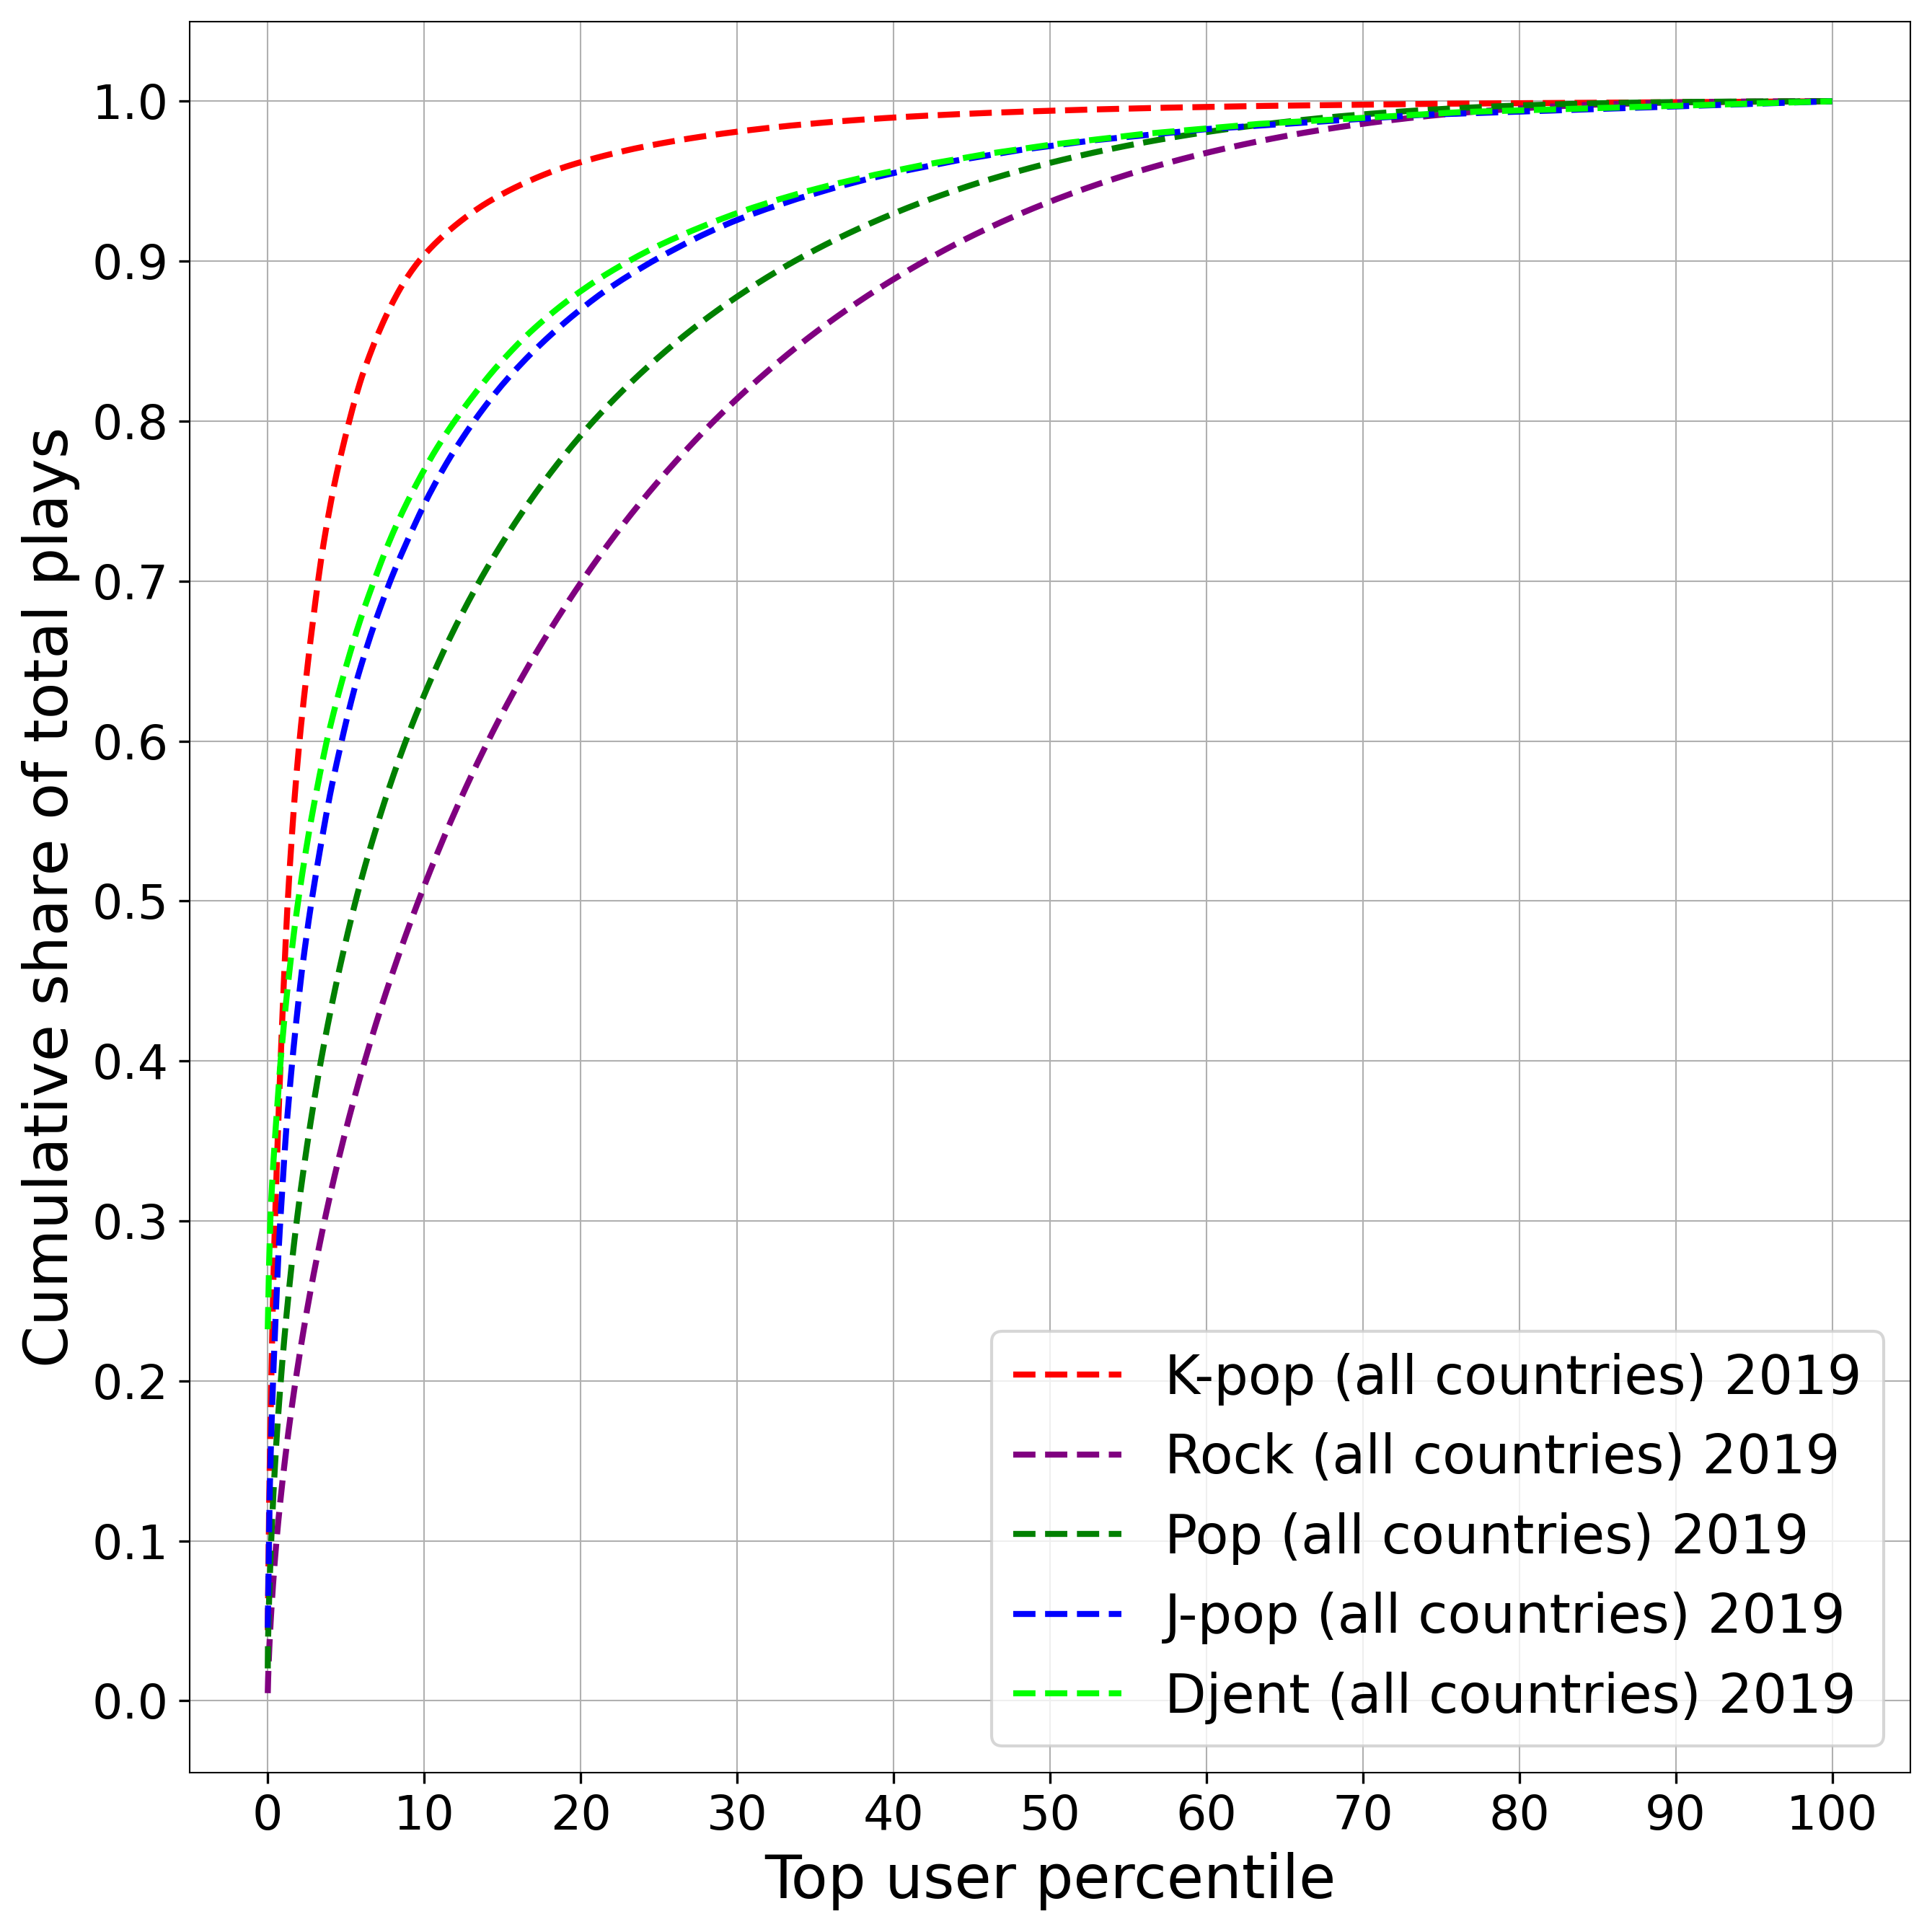

In [25]:
# 西本改修
import numpy as np
def plot_cdf (list_, ax_, label_, color_, linestyle_ = '--', linewidth_=2):
    cumsum_ = np.cumsum(np.array(list_))
    x_ = 100 * np.linspace(0, 1, len(cumsum_))
    y_ = cumsum_/cumsum_[-1]
    ax_.plot(x_, y_, label = label_, color = color_, linestyle = linestyle_, linewidth = linewidth_)

# --- スタイル設定 ---
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])
plt.rc('font', size=9)
plt.rc('axes', titlesize=20, labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('lines', linewidth=2.5)
fig, ax = plt.subplots(figsize=(9, 9))
plot_cdf(data_kpop_2019, ax, "K-pop (all countries) 2019", "red")
plot_cdf(data_rock_2019, ax, "Rock (all countries) 2019", "purple")
plot_cdf(data_pop_2019, ax, "Pop (all countries) 2019", "green")
plot_cdf(data_jpop_2019, ax, "J-pop (all countries) 2019", "blue")
plot_cdf(data_djent_2019, ax, "Djent (all countries) 2019", "lime")

ax.set_xlabel('Top user percentile')
ax.set_ylabel('Cumulative share of total plays')
# 対数スケールをやめて、線形スケールにする
ax.set_xscale('linear')
ax.set_yscale('linear')

# 0.1刻みの目盛を指定
ax.set_xticks(np.arange(0, 101, 10))  # 0.0 〜 1.0 までの 0.1 刻み
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.legend()
plt.grid()
plt.savefig("cumulative_share.eps", dpi=300, bbox_inches='tight')
plt.savefig("cumulative_share.pdf", dpi=300, bbox_inches='tight')

<string>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<string>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_2208236/3330114086.py:30: SyntaxWarning: invalid escape sequence '\{'
  print(f"\{title}")
Calculating best minimal value for power law fit
/opt/conda/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/opt/conda/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


\Indonesia-2013
Power law vs Exponential:
  R = 3.4735, p = 0.2852, z = 1.0687014758067794, sample_size = 83
Power law vs Lognormal:
  R = -0.3541, p = 0.5659, z = 0.5741569235851338, sample_size = 83
Lognormal vs : Exponential
  R = 3.8277, p = 0.1473, z = 1.4491173574743268, sample_size = 83
⚠️ No significant difference between power law & exponential.
⚠️ No significant difference between power law & lognormal.
⚠️ No significant difference between lognormal & exponential.
\Indonesia-2016
Power law vs Exponential:
  R = 1.4781, p = 0.5903, z = 0.5383401402604211, sample_size = 45
Power law vs Lognormal:
  R = -0.5337, p = 0.4937, z = 0.6844292978955008, sample_size = 45
Lognormal vs : Exponential
  R = 2.0118, p = 0.3080, z = 1.0194549028574993, sample_size = 45
⚠️ No significant difference between power law & exponential.
⚠️ No significant difference between power law & lognormal.
⚠️ No significant difference between lognormal & exponential.
\Indonesia-2019
Power law vs Exponential:


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


\United States-2013
Power law vs Exponential:
  R = 976.8546, p = 0.0000, z = 5.19823267647743, sample_size = 505
Power law vs Lognormal:
  R = -15.6553, p = 0.0000, z = 4.185565759792173, sample_size = 505
Lognormal vs : Exponential
  R = 992.5098, p = 0.0000, z = 5.34726446039952, sample_size = 505
✅ Power law fits better than exponential.
 ✅ Lognormal fits better.
✅ Lognormal fits better than exponential.
\United States-2016
Power law vs Exponential:
  R = 514.2970, p = 0.0000, z = 5.333344421421087, sample_size = 238
Power law vs Lognormal:
  R = -5.9109, p = 0.0013, z = 3.224513616846296, sample_size = 238
Lognormal vs : Exponential
  R = 520.2079, p = 0.0000, z = 5.469446166400942, sample_size = 238
✅ Power law fits better than exponential.
 ✅ Lognormal fits better.
✅ Lognormal fits better than exponential.
\United States-2019
Power law vs Exponential:
  R = 279.8822, p = 0.0000, z = 6.9650748078930995, sample_size = 341
Power law vs Lognormal:
  R = -1.0312, p = 0.2974, z = 1.04

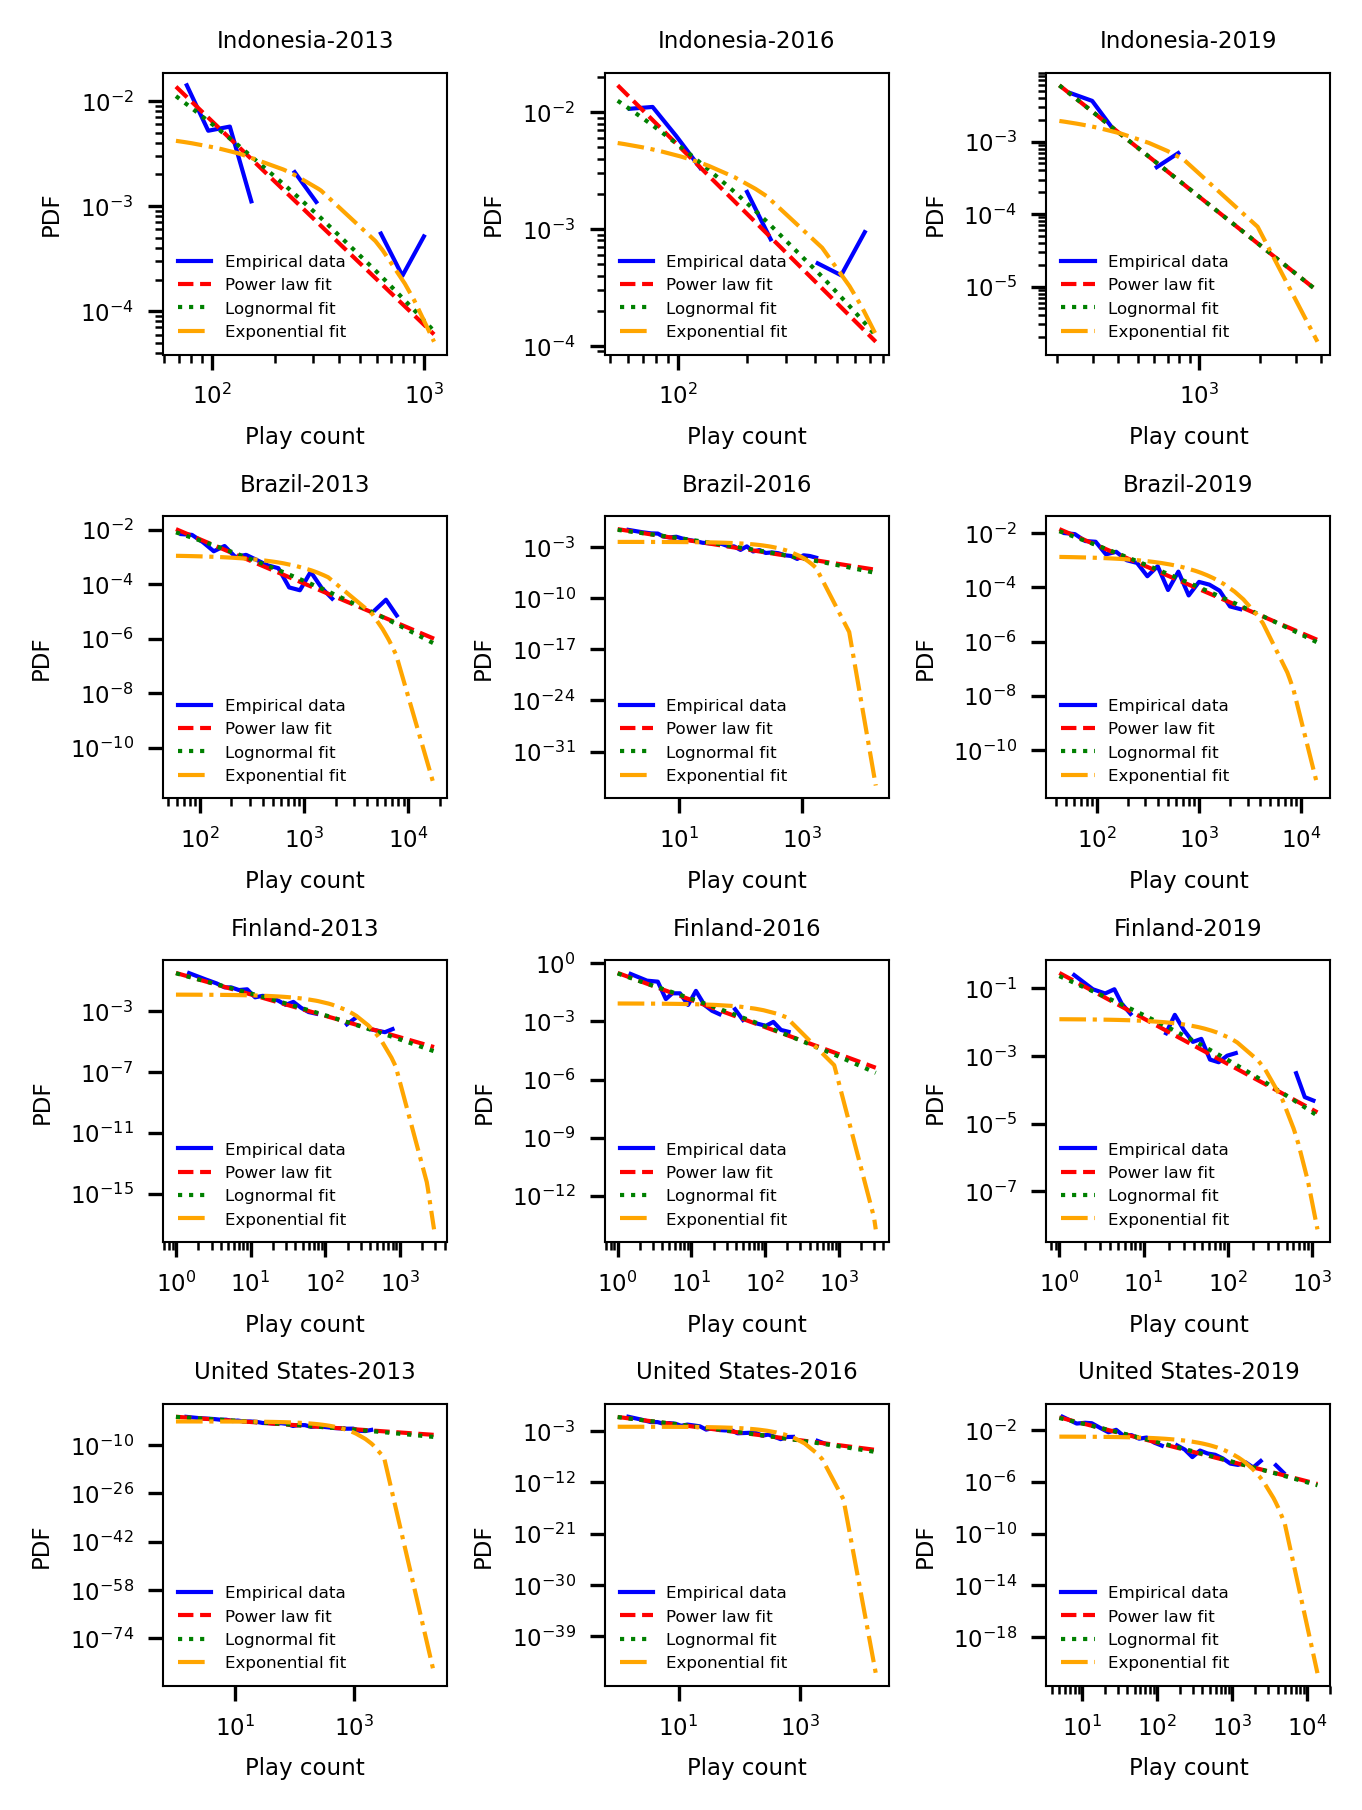

In [21]:
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfcinv

# スタイル設定（1回で十分）
plt.rcParams['figure.dpi'] = 300
#plt.style.use(['nature'])
plt.rc('font', size=5.5)
plt.rc('axes', titlesize=5.5, labelsize=5.5)
plt.rc('xtick', labelsize=5.5)
plt.rc('ytick', labelsize=5.5)
plt.rc('legend', fontsize=4)
plt.rc('lines', linewidth=1)
countries = ["Indonesia", "Brazil", "Finland", "United States"]

def z_from_p(p): #ただし、この値は絶対値が出力されることに注意
    if p <= 0 or p >= 1:
        return np.inf  # pが0または1に近いとzは無限大になる
    return np.sqrt(2) * erfcinv(p)

def test_distribution(data, i, j, k, title):
    plt.subplot(i, j, k)
    fit = powerlaw.Fit(data, discrete=True) 
    # 各分布との比較
    R_exp, p_exp = fit.distribution_compare('power_law', 'exponential')
    R_logn, p_logn = fit.distribution_compare('power_law', 'lognormal')
    R_exp2, p_exp2 = fit.distribution_compare('lognormal', 'exponential')
    
    print(f"\{title}")
    print("Power law vs Exponential:")
    print(f"  R = {R_exp:.4f}, p = {p_exp:.4f}, z = {z_from_p(p_exp)}, sample_size = {len(data)}")
    print("Power law vs Lognormal:")
    print(f"  R = {R_logn:.4f}, p = {p_logn:.4f}, z = {z_from_p(p_logn)}, sample_size = {len(data)}")
    print("Lognormal vs : Exponential")
    print(f"  R = {R_exp2:.4f}, p = {p_exp2:.4f}, z = {z_from_p(p_exp2)}, sample_size = {len(data)}")
    p_criteria = 0.017 # Bonferroniの補正
    
    if p_exp < p_criteria :
        print("✅ Power law fits better than exponential." if R_exp > 0 else "❌ Exponential fits better.")
    else:
        print("⚠️ No significant difference between power law & exponential.")
        
    if p_logn < p_criteria:
        print("✅ Power law fits better than lognormal." if R_logn > 0 else " ✅ Lognormal fits better.")
    else:
        print("⚠️ No significant difference between power law & lognormal.")

    if p_exp2 < p_criteria:
        print("✅ Lognormal fits better than exponential." if R_exp2 > 0 else "❌ Exponential fits better.")
    else:
        print("⚠️ No significant difference between lognormal & exponential.")
    
    # プロット
    fit.plot_pdf(color='b', linewidth=1, label='Empirical data')
    fit.power_law.plot_pdf(color='r', linestyle='--', label='Power law fit')
    fit.lognormal.plot_pdf(color='g', linestyle=':', label='Lognormal fit')
    fit.exponential.plot_pdf(color='orange', linestyle='-.', label='Exponential fit')
    plt.xlabel("Play count")
    plt.ylabel("PDF")
    plt.title(title)
    legend = plt.legend()  # ← ここで凡例を取得
    legend.get_frame().set_visible(False)  # ← ここで枠を非表示にする

# 図の作成とサブプロット描画
plt.figure(figsize=(4.5, 6))
i = 1
for country in countries:
    for year in range(2013, 2020, 3):
        data = data_dict[country][year]
        test_distribution(data, 4, 3, i, f"{country}-{year}")
        i += 1
        
plt.tight_layout()
#plt.savefig("/disks/qnap3/users/24-nishimoto/tmp/nakamura_help/plos_one/figs/s2_fig.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("s2_fig.pdf", dpi=300, bbox_inches='tight')
plt.show()